In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
twitts_train = pd.read_csv("twitter_training.csv")
twitts_valid = pd.read_csv("twitter_validation.csv")

In [3]:
# Naming each column
column_name=['TweetID','Entity','Sentiment','Tweet_Content']
twitts_train.columns=column_name
twitts_valid.columns=column_name
# Combining 2 dataframes to 1 dataframe
twitts=pd.concat([twitts_train,twitts_valid],ignore_index=False)
twitts.head()

,TweetID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
twitts.columns.tolist()

['TweetID', 'Entity', 'Sentiment', 'Tweet_Content']

In [5]:
twitts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47293 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        47293 non-null  int64 
 1   Entity         47293 non-null  object
 2   Sentiment      47293 non-null  object
 3   Tweet_Content  46848 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
twitts.isnull().sum()

TweetID            0
Entity             0
Sentiment          0
Tweet_Content    445
dtype: int64

In [7]:
twitts.duplicated().sum()

2033

In [8]:
twitts.dropna(inplace=True)
twitts.drop_duplicates(inplace=True)
print(twitts.isnull().sum())
print("Duplicate Values:",twitts.duplicated().sum())

TweetID          0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64
Duplicate Values: 0


In [9]:
twitts.drop(columns=['TweetID','Tweet_Content'],inplace=True)
twitts.head()

,Entity,Sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


In [10]:
twitts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45046 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Entity     45046 non-null  object
 1   Sentiment  45046 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


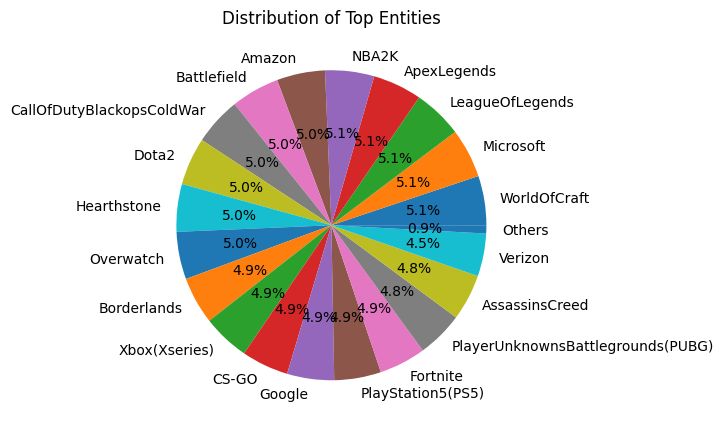

In [29]:
entity_content = twitts['Entity'].value_counts()

# Define the number of top entities you want to display
n = 20

# Select the top n entities
top_entities = entity_content[:n]

# Sum the counts of the remaining entities and categorize them as "Others"
others_count = entity_content[n:].sum()
top_entities['Others'] = others_count

# Plot the pie chart
top_entities.plot(kind='pie', autopct='%1.1f%%', figsize=(5, 10))
plt.title('Distribution of Top Entities')
plt.ylabel('')  # to remove the 'Entity' label from the y-axis
plt.show()

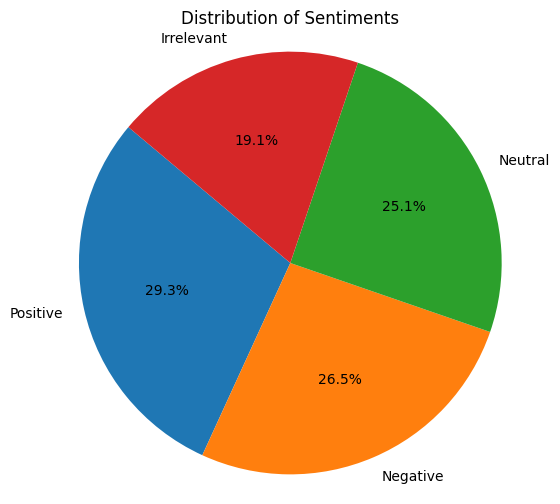

In [33]:
# Calculate the distribution of sentiments
sentiment_distribution = twitts['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart 42.2
plt.show()

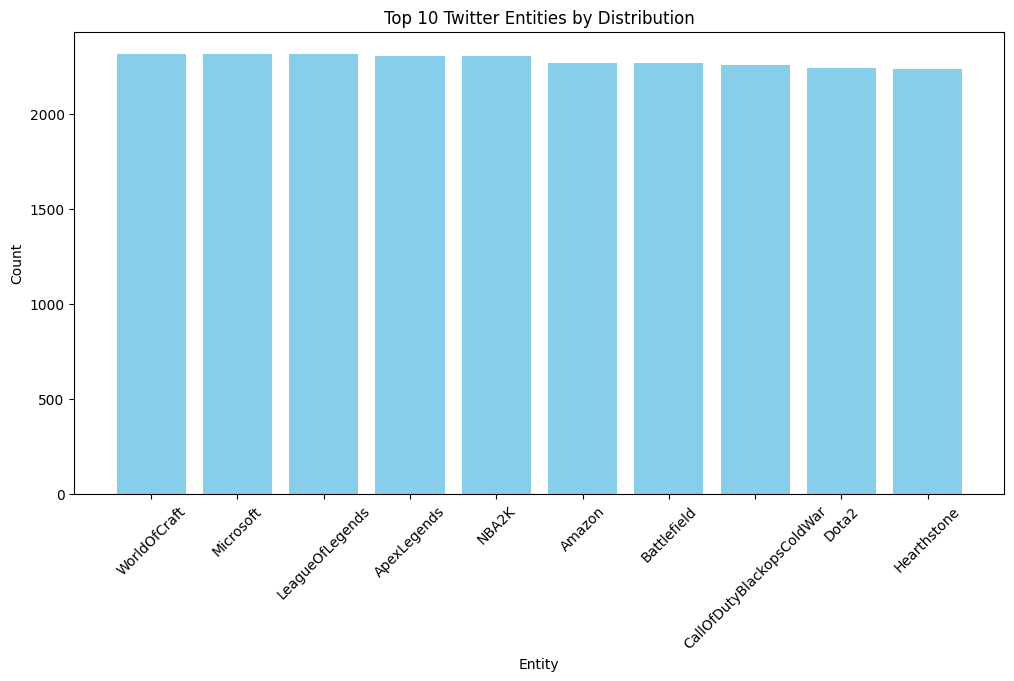

In [19]:
# Calculate the distribution of entities
entity_distribution = twitts['Entity'].value_counts()

# Select the top 10 entities
top_10_entities = entity_distribution.head(10)

# Create a bar chart for the top 10 entities
plt.figure(figsize=(12, 6))
plt.bar(top_10_entities.index, top_10_entities.values, color='skyblue')
plt.title('Top 10 Twitter Entities by Distribution')
plt.xlabel('Entity')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the bar chart
plt.show()

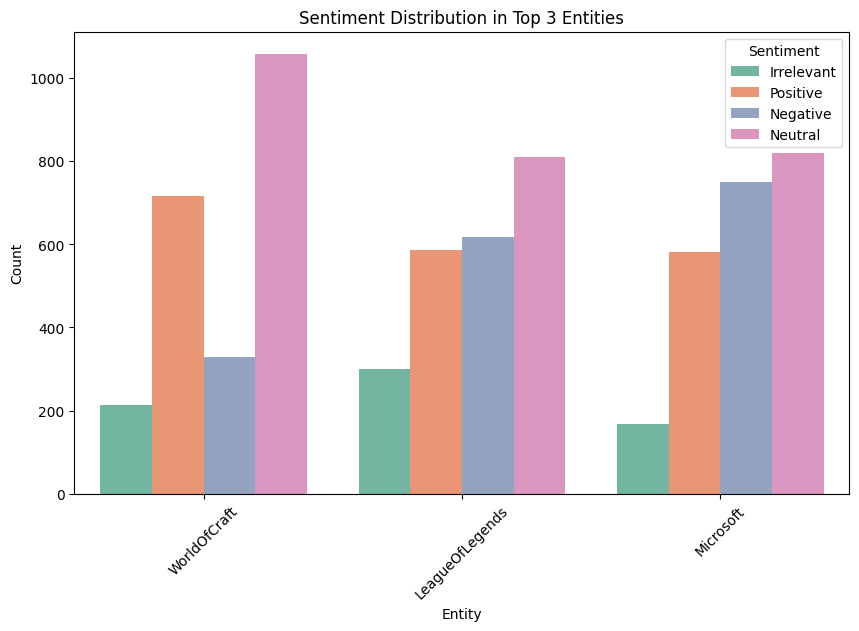

In [21]:
# Calculate the distribution of entities
entity_distribution = twitts['Entity'].value_counts()

# Select the top 3 entities
top_3_entities = entity_distribution.head(3).index

# Filter the DataFrame to include only the top 3 entities
df_top_3 = twitts[twitts['Entity'].isin(top_3_entities)]

# Create a grouped bar chart for sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_3, x='Entity', hue='Sentiment', palette='Set2')
plt.title('Sentiment Distribution in Top 3 Entities')
plt.xlabel('Entity')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the grouped bar chart
plt.show()

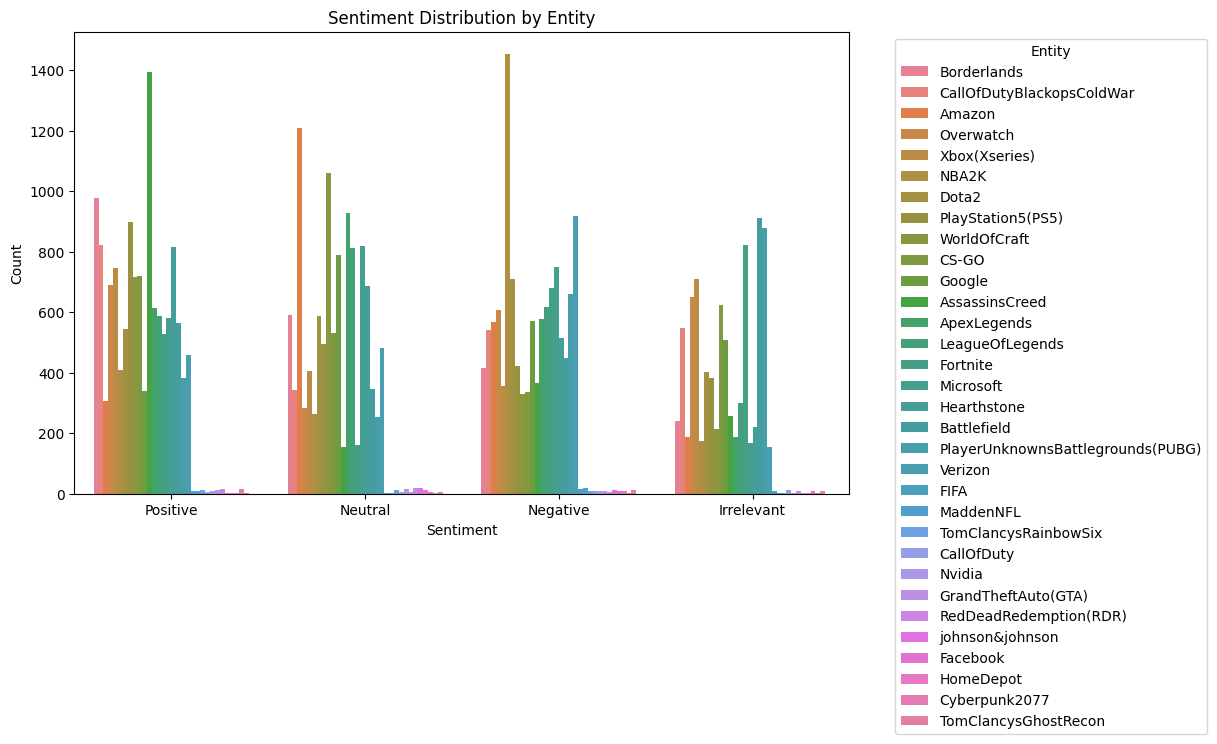

In [23]:
# Example for sentiment distribution by entity
plt.figure(figsize=(10, 6))
sns.countplot(data=twitts, x='Sentiment', hue='Entity')
plt.title("Sentiment Distribution by Entity")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()